In [1]:
import pandas as pd

In [2]:
#  From $ man perf stat
#  The fields are in this order:
#        ·   optional usec time stamp in fractions of second (with -I xxx)
#        ·   optional CPU, core, or socket identifier
#        ·   optional number of logical CPUs aggregated
#        ·   counter value
#        ·   unit of the counter value or empty
#        ·   event name
#        ·   run time of counter
#        ·   percentage of measurement time the counter was running
#        ·   optional variance if multiple values are collected with -r
#        ·   optional metric value
#        ·   optional unit of metric
STATS = ["counter_value", "counter_value_unit", "event_name", "counter_value_variance", "counter_run_time", "counter_run_time_porcentage", "metric_value","metric_name"]

In [3]:
from datetime import datetime

In [4]:
import re

In [5]:
from pathlib import Path

In [6]:
dir = Path('../solutions/original/log/boyerito')

In [7]:
def parse_stats(filepath):
    df = pd.read_csv(filepath, names=STATS, skiprows=1)
    filename = filepath.name
    parts = filename.split('-')
    df['run_start_time'] = datetime.strptime(filename[:16],'%Y-%m-%dT%H:%M')
    df['cc'] = parts[5]
    dni = parts.index('dn')
    df['n'] = int(parts[dni+1])
    df['cldflags'] = '-'.join(parts[6:dni])
    return df

In [8]:
data = []
for child in dir.iterdir(): 
    if child.match('*.csv'):
        data.append(parse_stats(child))

In [9]:
df = pd.concat(data).reset_index(drop=True)

In [10]:
gflops_256 = df[(df.metric_name == 'GFLOPs') & (df.n == 256)]
gflops_256

,counter_value,counter_value_unit,event_name,counter_value_variance,counter_run_time,counter_run_time_porcentage,metric_value,metric_name,run_start_time,cc,n,cldflags
13,18,NaN,fp_arith_inst_retired.scalar_single,12.73%,4058525480,66.67,1.6,GFLOPs,2021-04-19 15:30:00,icc,256,ofast-march-native-lm
23,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4277644584,66.63,1.6,GFLOPs,2021-04-19 15:26:00,gcc_5,256,o4-march-native-flto-lm
43,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,10768618054,66.67,0.7,GFLOPs,2021-04-19 14:41:00,gcc_5,256,o0-lm
53,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4070046047,66.65,1.6,GFLOPs,2021-04-19 15:07:00,gcc_5,256,o3-march-native-lm
63,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4336969681,66.66,1.3,GFLOPs,2021-04-19 15:10:00,clang_12,256,o4-march-native-lm
83,19,NaN,fp_arith_inst_retired.scalar_single,8.04%,4266403347,66.65,1.5,GFLOPs,2021-04-19 15:07:00,icc,256,o3-march-native-lm
103,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,11447677704,66.65,0.7,GFLOPs,2021-04-20 17:07:00,gcc_5,256,o0-lm
113,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4050522550,66.61,1.3,GFLOPs,2021-04-19 15:07:00,clang_6_0,256,o3-march-native-lm
123,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4030670631,66.60,1.4,GFLOPs,2021-04-19 15:26:00,clang_6_0,256,o4-march-native-flto-lm
133,0,NaN,fp_arith_inst_retired.scalar_single,0.00%,4188996201,66.65,1.3,GFLOPs,2021-04-19 15:23:00,clang_12,256,o4-march-native-ffast-math-lm


In [11]:
gflops_256[["cc", "cldflags", "metric_value"]].sort_values("metric_value", ascending = False)

,cc,cldflags,metric_value
423,nvc,o4-march-native-lm,2.8
533,nvc,o4-march-native-mipa-fast-inline,2.7
363,nvc,o4-march-native-lm,2.7
253,nvc,o4-march-native-mipa-fast,2.7
693,nvc,o4-march-native-lm,2.5
723,gcc_10,o4-march-native-floop-block-lm,1.7
673,gcc_10,o4-march-native-lm,1.7
443,gcc_10,o4-march-native-flto-lm,1.6
23,gcc_5,o4-march-native-flto-lm,1.6
403,gcc_10,o3-march-native-lm,1.6


In [12]:
gflops_256[gflops_256.cc == 'nvc'][["cc","cldflags", "metric_value"]].groupby("cldflags").mean().sort_values("metric_value", ascending = False)

,metric_value
cldflags,
o4-march-native-mipa-fast,2.700000
o4-march-native-mipa-fast-inline,2.700000
o4-march-native-lm,2.666667
fast-march-native-lm,1.400000
o3-march-native-lm,1.400000
o0-lm,0.900000


In [13]:
gflops_256[gflops_256.cc == 'gcc_10'][["cc","cldflags", "metric_value"]].groupby("cldflags").mean().sort_values("metric_value", ascending = False)

,metric_value
cldflags,
o4-march-native-floop-block-lm,1.7
o4-march-native-lm,1.7
o3-march-native-lm,1.6
o4-march-native-flto-lm,1.6
o4-march-native-funroll-loops-lm,1.6
o4-march-native-ffast-math-lm,1.3
ofast-march-native-lm,1.3
o0-lm,0.8


In [14]:
gflops_256[gflops_256.cldflags == "o4-march-native-lm"][["metric_value", "cc"]].sort_values("metric_value", ascending = False)

,metric_value,cc
423,2.8,nvc
363,2.7,nvc
693,2.5,nvc
673,1.7,gcc_10
313,1.6,gcc_5
463,1.6,icc
63,1.3,clang_12
393,1.3,clang_6_0


In [15]:
duration_256 = df[(df.event_name == 'duration_time') & (df.n == 256)]
duration_256["duration_time"] = duration_256["counter_value"] / 10**9
duration_256[duration_256.cldflags == "o4-march-native-lm"][["cc", "cldflags", "duration_time"]].groupby("cc").mean().sort_values("duration_time")

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,duration_time
cc,
nvc,4.798125
gcc_10,6.070026
clang_6_0,6.112612
gcc_5,6.119833
icc,6.193688
clang_12,6.520055


In [16]:
duration_256[duration_256.cc == "gcc_10"][["cc", "cldflags", "duration_time"]].groupby("cldflags").mean().sort_values("duration_time")

,duration_time
cldflags,
o4-march-native-lm,6.070026
o4-march-native-floop-block-lm,6.086514
o4-march-native-funroll-loops-lm,6.144475
o4-march-native-flto-lm,6.149851
o3-march-native-lm,6.198089
o4-march-native-ffast-math-lm,6.348907
ofast-march-native-lm,6.354833
o0-lm,15.254536


In [17]:
gflops_scaling = df[(df.metric_name == 'GFLOPs') & (df.cc == 'nvc') & (df.cldflags == 'o4-march-native-lm')]
gflops_scaling['GFLOPs_div_n'] = gflops_scaling["metric_value"] / gflops_scaling["n"]
gflops_scaling = gflops_scaling.sort_values("n", ascending = False)
gflops_scaling[["metric_value", "cc", "n", 'GFLOPs_div_n']].groupby(by=["cc","n"]).mean()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


metric_value  GFLOPs_div_n
cc  n                               
nvc 32        2.400000      0.075000
    108       4.900000      0.045370
    256       2.666667      0.010417
    500       3.250000      0.006500
    864       5.150000      0.005961
    1372      3.900000      0.002843
    2048      4.600000      0.002246
    4000      4.800000      0.001200

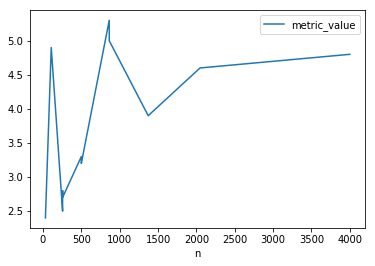

In [18]:
%matplotlib inline
gflops_scaling.plot("n","metric_value");

In [19]:
gflops_864 = df[(df.metric_name == 'GFLOPs') & (df.n == 864)]
gflops_864[["cc", "cldflags", "metric_value"]].groupby("cc").mean().sort_values("metric_value", ascending = False)

,metric_value
cc,
nvc,5.15
clang_12,3.60
clang_6_0,3.30
gcc_10,1.70
gcc_5,1.60
icc,1.50


In [20]:
duration_864 = df[(df.event_name == 'duration_time') & (df.n == 864)]
duration_864["duration_time"] = duration_864["counter_value"] / 10**9
duration_864[["cc", "duration_time"]].groupby("cc").mean().sort_values("duration_time")

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,duration_time
cc,
clang_12,15.096954
clang_6_0,16.617324
nvc,18.416434
gcc_10,52.412115
gcc_5,54.437460
icc,56.167497


In [21]:
gflops_500 = df[(df.metric_name == 'GFLOPs') & (df.n == 500)]
gflops_500[["cc", "cldflags", "metric_value"]].sort_values("metric_value", ascending = False)

,cc,cldflags,metric_value
713,nvc,o4-march-native-lm,3.3
213,nvc,o4-march-native-lm,3.2
33,icc,o4-march-native-lm,1.6
3,gcc_10,o4-march-native-lm,1.5
633,gcc_5,o4-march-native-lm,1.5
263,clang_12,o4-march-native-lm,1.3
303,clang_6_0,o4-march-native-lm,1.3


In [22]:
duration_500 = df[(df.event_name == 'duration_time') & (df.n == 500)]
duration_500["duration_time"] = duration_500["counter_value"] / 10**9
duration_500[["cc", "cldflags", "duration_time"]].sort_values("duration_time")

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cc,cldflags,duration_time
719,nvc,o4-march-native-lm,12.169115
219,nvc,o4-march-native-lm,12.489566
309,clang_6_0,o4-march-native-lm,20.040008
39,icc,o4-march-native-lm,20.083048
269,clang_12,o4-march-native-lm,20.471559
639,gcc_5,o4-march-native-lm,20.904318
9,gcc_10,o4-march-native-lm,21.205498
